# 第一次计算物理作业

学号： 2021300002018

姓名： 朱向阳

## 1. 使用vpython绘制复杂的三维结构，并让这个三维结构运动来。（太阳系行星模拟）

（用万有引力公式计算，自动调整摄像机视角）

In [209]:
import vpython as vp
import numpy as np
import os 
import scipy
import matplotlib.pyplot as plt
import pandas

<IPython.core.display.Javascript object>

In [210]:
# 因为按照真实比例画太阳系模型画不下来，故此处星球各参数为调整后的比例

info = {'sun': {'index': 1, 'texture': 'Sun_texture.jpg', 'm': 1000, 'pos': vp.vector(0,0,0), 'r': 0.5, 'p': vp.vector(0,0,0), 'rotate':0.3, 'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, 1, 0)}, 
         'mercury': {'index': 2, 'texture': 'mercury_texture.jpg', 'm': 0.01, 'pos': vp.vector(1,0,0), 'r': 0.05, 'p': vp.vector(0, 0,-0.3), 'rotate':0.2, 'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, 1, 0)},
         'venus': {'index': 3, 'texture': 'venus_texture.jpg', 'm': 0.02, 'pos': vp.vector(0,0,3), 'r': 0.075, 'p': vp.vector(0.35,0,0), 'rotate':0.1, 'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, 1, 0)},
         'earth': {'index': 4, 'texture': 'earth_texture.jpg', 'm': 0.10, 'pos': vp.vector(-4,0,0), 'r': 0.1, 'p': vp.vector(0,0,1.6), 'rotate':0.4, 'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, -1, 0)},
         'mars': {'index': 5, 'texture': 'mars_texture.jpg', 'm': 0.06, 'pos': vp.vector(0,0,6), 'r': 0.08, 'p': vp.vector(0.8,0,0), 'rotate':0.25, 'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, 1, 0)},
         'jupyter': {'index': 6, 'texture': 'jupyter_texture.jpg', 'm': 2, 'pos': vp.vector(9,0,0), 'r': 0.2, 'p': vp.vector(0,0,-22), 'rotate':0.1, 'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, 1, 0)},
         'saturn': {'index': 7, 'texture': 'saturn_texture.jpeg', 'm': 1.6, 'pos': vp.vector(0,0,12), 'r': 0.1, 'p': vp.vector(14,0,0), 'rotate':0.4, 'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, 1, 0)},
         'uranus': {'index': 8, 'texture': 'uranus_texture.png', 'm': 1.4, 'pos': vp.vector(-13,0,0), 'r': 0.07, 'p': vp.vector(0,0,12), 'rotate':0.3, 'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, 1, 0)},
         'neptune': {'index': 9, 'texture': 'neptune_texture.jpg', 'm': 1.2, 'pos': vp.vector(0,0,15), 'r': 0.06, 'p': vp.vector(10,0,0), 'rotate':0.2, 'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, 1, 0)},
         'moon': {'index': 10, 'texture': 'moon_texture.jpeg', 'm': 0.001, 'pos': vp.vector(0,-4,0.05), 'r': 0.04, 'p': vp.vector(0.001,0,-0.02), 'rotate':0.1,  'trail_c': vp.color.white, 'rotate_axis':vp.vector(0, 1, 0)}}

# 星球信息列表

texture_url = {'sun':'https://s2.loli.net/2023/10/10/wnQK3Y2xj54vf6I.jpg',
               'mercury':'https://s2.loli.net/2023/10/10/cKfoW3hjvYCx52O.jpg',
               'venus':'https://s2.loli.net/2023/10/10/W8vBfG6PFICdZOu.jpg',
               'earth':'https://s2.loli.net/2023/10/10/fxpiz7IT5qtC2us.jpg',
               'mars':'https://s2.loli.net/2023/10/10/IMWoVSmC183p2UB.jpg',
               'jupyter':'https://s2.loli.net/2023/10/10/ODx7nAuRsKhPaWC.jpg',
               'saturn':'https://s2.loli.net/2023/10/10/hsZYaIClwq34GPN.jpg',
               'uranus':'https://s2.loli.net/2023/10/10/ayA9r6hfFTndtQc.png',
               'neptune':'https://s2.loli.net/2023/10/10/Q4tnGAaZRJOcEzh.jpg',
               'moon':'https://s2.loli.net/2023/10/10/Q4tnGAaZRJOcEzh.jpg'
              }
# 因为提交的ipynb,故使用图床加载材质

In [211]:
scene = vp.canvas(title="Solar System", width=1000, height=1000, x=0, y=0,
               center=vp.vector(0, 0, 0), background=vp.color.black, autoscale=True)

scene.range = 1

stars_name = list(info.keys())
index = np.arange(0,9) # 因为月球的数值很难调整合适，故暂不画月球
stars_name = np.array(stars_name)[index]
# stars = [vp.sphere(pos=info[star]['pos'], radius=info[star]['r'], mass=info[star]['m'], momentum=info[star]['p'], 
#          texture=info[star]['texture'], make_trail=True, trail_radius=0.005) for star in stars_name]
stars = [vp.sphere(pos=info[star]['pos'], radius=info[star]['r'], mass=info[star]['m'], momentum=info[star]['p'], 
         texture={'file':texture_url[star]}, make_trail=True, trail_radius=0.01) for star in stars_name]

star_num = len(stars)
rotate_speed = np.array([x['rotate'] for x in info.values()])[index] #自转速度
rotate_angle = np.zeros(star_num) # 转角
rotate_axis = np.array([x['rotate_axis'] for x in info.values()])[index] #转轴
scene.waitfor("textures")
scene.visible

G = 1 #暂定为1 

def update_pos(G, star_num, pos, mass, momentum, dt):
#更新坐标函数，用numpy加速计算

    mass_matrix = (mass.reshape(star_num, 1) * mass)[~ np.eye(star_num,dtype=bool)].reshape(star_num, star_num-1, 1)
    # 计算m1*m2矩阵，同时删去对角元素
    bool_matrix = ~ np.repeat(np.eye(star_num,dtype=bool).reshape(star_num, star_num, 1), 3, axis=2)
    rvector_matrix = np.tile(pos, (star_num, 1, 1)).transpose(1,0,2) - np.tile(pos, (star_num, 1, 1))
    # 计算r1-r2矩阵， rvector_matrix: r_ij = pos_i - pos_j
    rvector_diag = rvector_matrix[bool_matrix].reshape(star_num, star_num-1, 3)
    # 删去对角
    mag_matrix = np.linalg.norm(rvector_diag, axis=2, keepdims=True)
    F_matrix = - G * rvector_diag * mass_matrix / mag_matrix**3
    # 计算引力矩阵
    Force = np.sum(F_matrix, axis=1)
    momentum = momentum + Force * dt
    pos = pos + momentum / mass.reshape(star_num, 1) * dt
    # 合并计算新坐标
    return pos, momentum

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
t = 0
dt = 0.000002 # 时间步进

while(True):
    vp.rate(1000000)
    
    pos = np.array([star.pos.value for star in stars])
    mass = np.array([star.mass for star in stars])
    momentum = np.array([star.momentum.value for star in stars])
    # vpython.vector转换为numpy数组
    
    pos, momentum = update_pos(G, star_num, pos, mass, momentum, dt)
    rotate_angle += rotate_speed * dt * 0.001 #  控制自转

    for i in range(star_num):
        stars[i].pos = vp.vector(pos[i][0], pos[i][1], pos[i][2])
        stars[i].momentum = vp.vector(momentum[i][0], momentum[i][1], momentum[i][2])
        stars[i].rotate(angle=rotate_angle[i], axis=rotate_axis[i]) 
    # 更新对象信息
    
    t += dt
    
    scene.camera.pos += scene.camera.up*dt*8*0.3
    scene.camera.rotate(angle = dt*8*0.3, axis = vp.vector(-1,0,0)) 
    scene.range += dt*8
    scene.center = vp.vector(0,0,0)# 控制摄像机视角缩放

## 2. 使用sympy验证谐振子势的基态、第一至第三激发态的波函数满足定态薛定谔方程。

In [1]:
from sympy.physics.qho_1d import psi_n
from sympy.abc import m, x, omega
from sympy.physics.qho_1d import E_n
from sympy.physics.quantum.constants import hbar
from sympy import diff, simplify, lambdify, pi
from sympy.functions import exp, sqrt
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
for i in range(50):
    E = E_n(i, omega)
    psi = psi_n(i, x, m, omega)
    print(not bool(simplify(-hbar**2 / (2 * m) * diff(psi, x, x) + (1/2 * m * omega**2 * x**2) * psi- E * psi)))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


## 3. 使用matplotlib绘制第50激发态波函数的概率密度分布

In [186]:
# psi_func = lambdify((x, m, omega, hbar), psi_n(50, x, m, omega), modules=['numpy']) 这种方法会溢出，转而使用解析解
# em = np.double(9.10938215e-31)
# eo = np.double(1.6e-19 / hbar.evalf())
# psi_squared = np.abs(psi_func(x_array, em, eo, hbar = hbar.evalf()))**2  # 计算波函数的模的平方

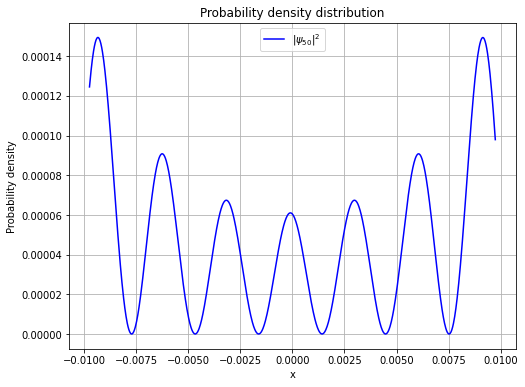

In [21]:
m = 1e-30
omega = 1e-10
n = 50
coeff = np.ones(n + 1)
alpha = np.sqrt(m * omega / np.double(hbar.evalf()))

x_d, x_u, x_s = -10, 10, 1000
x_array = np.linspace(x_d, x_u, x_s) * alpha

_, H_n = np.polynomial.hermite.Hermite(coeff, domain=(x_d, x_u)).linspace(x_s)
A_n = np.sqrt(alpha / (np.sqrt(np.pi) * np.power(2, np.double(n)) * math.factorial(n)))
psi_n = A_n * np.exp(-0.5 * np.power(x_array, 2)) * H_n

# 绘制概率密度分布
plt.figure(figsize=(8, 6))
plt.plot(x_array, np.abs(psi_n **2) , color='blue', label=r'$|\psi_{' + str(n) + r'}|^2$')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Probability density distribution')
plt.legend()
plt.grid(True)
plt.show()

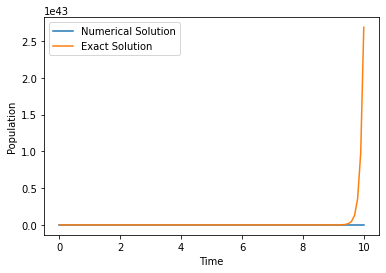

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义方程的参数
a = 10
b = 0

# 定义时间步长和总时间
dt = 0.1
t_total = 10

# 初始人口数量
N0 = 1

# 计算步数
num_steps = int(t_total / dt)

# 初始化时间和人口数量数组
t = np.zeros(num_steps+1)
N = np.zeros(num_steps+1)

# 设置初始值
t[0] = 0
N[0] = N0

# 使用欧拉方法进行数值解
for i in range(num_steps):
    dN_dt = a * N[i] - b * N[i]**2
    N[i+1] = N[i] + dt * dN_dt
    t[i+1] = t[i] + dt

# 计算精确解
t_exact = np.linspace(0, t_total, 100)
N_exact = N0 * np.exp(a * t_exact)

# 绘图比较
plt.plot(t, N, label='Numerical Solution')
plt.plot(t_exact, N_exact, label='Exact Solution')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()